In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

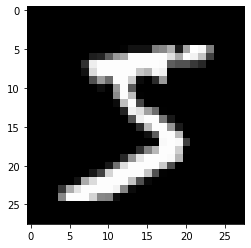

In [3]:
plt.imshow(train_images[0], cmap="gray")

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
from keras import models, layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

In [9]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255.0

In [11]:
from keras.utils import to_categorical

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels.shape

(60000, 10)

In [15]:
test_labels.shape

(10000, 10)

In [16]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
network.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 5ms/step - loss: 0.2553 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1041 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0382 - accuracy: 0.9884


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:{0}".format(test_acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9813
test_acc:0.9812999963760376


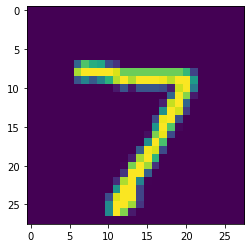

In [19]:
plt.imshow(test_images[0].reshape(28, -1))

In [20]:
test_labels[0].argmax()

7

In [21]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)